# José Ligorría
## Proyecto



# Objetivos

- Crear un pipeline para determinar los mejores modelos de clasificación binaria para determinar si un pasajero sobreviviría en un dataset con información sobre pasajeros del titanic. Los modelos a probar son Árboles de Clasificación, Máquinas de vectores de soporte, Rgresión Logística y Redes neuronales.
- Obtener al menos un 80% de accuracy como métrica de eficiencia en éste dataset y con esos modelos.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
import itertools
from datetime import datetime
from collections import Counter
from sklearn import tree
from sklearn import svm
from sklearn.utils.validation import column_or_1d
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import csv

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
df = pd.read_csv ('data_titanic_proyecto.csv')
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [4]:
len(df)

891

In [5]:
df.columns.values.tolist()

['PassengerId',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'passenger_class',
 'passenger_sex',
 'passenger_survived']

In [6]:
len(df)

891

In [7]:
piv_C = Counter(df['SibSp'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
piv_C

Mean:  127.28571428571429
Std:  207.4923160613178


Counter({1: 209, 0: 608, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7})

In [8]:
pd.crosstab(np.array(df['SibSp']), np.array(df['passenger_survived']), rownames = ['SibSp'], colnames = ['passenger_survived'])

passenger_survived,N,Y
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Por lo anterior la variable 'SibSp' puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [9]:
piv_C = Counter(df['Parch'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
piv_C

Mean:  127.28571428571429
Std:  228.8678435165551


Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

In [10]:
pd.crosstab(np.array(df['Parch']), np.array(df['passenger_survived']), rownames = ['Parch'], colnames = ['passenger_survived'])

passenger_survived,N,Y
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Por lo anterior la variable 'Parch' puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [11]:
piv_C = Counter(df['Ticket'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
len(piv_C)

Mean:  1.3083700440528634
Std:  0.7920699945606182


681

In [12]:
len(piv_C) / len(df)

0.7643097643097643

Por lo anterior la variable 'Ticket' como se esperaba no puede apoyarnos a separar los sobrevivientes de los no sobrevivientes.

In [13]:
piv_C = Counter(df['Fare'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  3.592741935483871
Std:  5.837126355895769
Valores distintoos 248


Counter({7.25: 13,
         71.2833: 1,
         7.925: 18,
         53.1: 5,
         8.05: 43,
         8.4583: 1,
         51.8625: 2,
         21.075: 4,
         11.1333: 3,
         30.0708: 2,
         16.7: 2,
         26.55: 15,
         31.275: 7,
         7.8542: 13,
         16.0: 1,
         29.125: 5,
         13.0: 42,
         18.0: 3,
         7.225: 12,
         26.0: 31,
         8.0292: 1,
         35.5: 4,
         31.3875: 4,
         263.0: 4,
         7.8792: 4,
         7.8958: 38,
         27.7208: 5,
         146.5208: 2,
         7.75: 34,
         10.5: 24,
         82.1708: 2,
         52.0: 7,
         7.2292: 15,
         11.2417: 2,
         9.475: 1,
         21.0: 6,
         41.5792: 3,
         15.5: 8,
         21.6792: 1,
         17.8: 2,
         39.6875: 6,
         7.8: 1,
         76.7292: 3,
         61.9792: 1,
         27.75: 4,
         46.9: 6,
         80.0: 2,
         83.475: 2,
         27.9: 6,
         15.2458: 5,
         8.1583: 

Por lo anterior la variable 'Fare' no la omitimos aunque no se espera aporte mucho y en futuros análisis se obtendrá la respuesta de cuanto aporte.

In [14]:
piv_C = Counter(df['Cabin'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  6.02027027027027
Std:  56.170044627367595
Valores distintoos 148


Counter({nan: 687,
         'C85': 1,
         'C123': 2,
         'E46': 1,
         'G6': 4,
         'C103': 1,
         'D56': 1,
         'A6': 1,
         'C23 C25 C27': 4,
         'B78': 1,
         'D33': 2,
         'B30': 1,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F33': 3,
         'F G73': 2,
         'E31': 1,
         'A5': 1,
         'D10 D12': 1,
         'D26': 2,
         'C110': 1,
         'B58 B60': 2,
         'E101': 3,
         'F E69': 1,
         'D47': 1,
         'B86': 1,
         'F2': 3,
         'C2': 2,
         'E33': 2,
         'B19': 1,
         'A7': 1,
         'C49': 1,
         'F4': 2,
         'A32': 1,
         'B4': 1,
         'B80': 1,
         'A31': 1,
         'D36': 2,
         'D15': 1,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'C87': 1,
         'B77': 2,
         'E67': 2,
         'B94': 1,
         'C125': 2,
         'C99': 1,
         'C118': 1,
         'D7': 1,
         'A19'

Por la alta presencia de valores "nan" y considerando que los demás valores no aportarían a la clasificación la variable 'Cabin' es omitida.

In [15]:
piv_C = Counter(df['Embarked'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  222.75
Std:  250.21128571669183
Valores distintoos 4


Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [16]:
pd.crosstab(np.array(df['Embarked']), np.array(df['passenger_survived']), rownames = ['Embarked'], colnames = ['passenger_survived'])

passenger_survived,N,Y
Embarked,,
C,75,93
Q,47,30
S,427,217


De lo anterior se considera que la variable 'Embarked' puede aportar al modelo a generar.

In [17]:
piv_C = Counter(df['passenger_class'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  297.0
Std:  137.79937106774713
Valores distintoos 3


Counter({'Lower': 491, 'Upper': 216, 'Middle': 184})

In [18]:
pd.crosstab(np.array(df['passenger_class']), np.array(df['passenger_survived']), rownames = ['passenger_class'], colnames = ['passenger_survived'])

passenger_survived,N,Y
passenger_class,,
Lower,372,119
Middle,97,87
Upper,80,136


De lo anterior se considera que la variable 'passenger_class' puede aportar valor

In [19]:
piv_C = Counter(df['passenger_sex'])
print("Mean: ",np.mean(list(piv_C.values())))
print("Std: ",np.std(list(piv_C.values())))
print("Valores distintoos",len(piv_C))
piv_C

Mean:  445.5
Std:  131.5
Valores distintoos 2


Counter({'M': 577, 'F': 314})

In [20]:
pd.crosstab(np.array(df['passenger_sex']), np.array(df['passenger_survived']), rownames = ['passenger_sex'], colnames = ['passenger_survived'])

passenger_survived,N,Y
passenger_sex,,
F,81,233
M,468,109


Por lo que l variable 'passenger_sex' puede ser un alto indicador de sobrevivencia.

In [21]:
dataset = df[['SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex','passenger_survived']]
len(dataset)

891

In [22]:
dataset.head()

,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,0,7.2500,S,Lower,M,N
1,1,0,71.2833,C,Upper,F,Y
2,0,0,7.9250,S,Lower,F,Y
3,1,0,53.1000,S,Upper,F,Y
4,0,0,8.0500,S,Lower,M,N


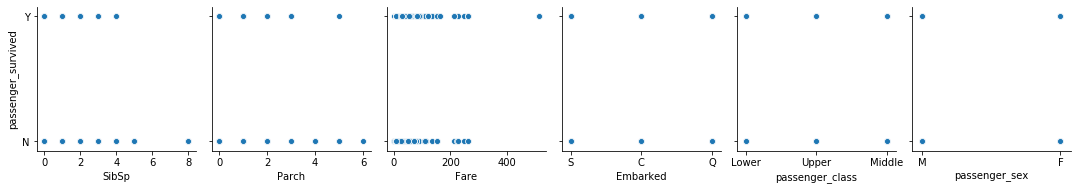

In [23]:
pp = sns.pairplot(data=dataset,
                  y_vars=['passenger_survived'],
                  x_vars=['SibSp', 'Parch',
                          'Fare','Embarked','passenger_class',
                         'passenger_sex'])

In [24]:
reg_out = [False]*len(dataset)
for f in ['SibSp', 'Parch','Fare','Embarked','passenger_class','passenger_sex']:
    piv_f = dataset[f]
    print(f,len(Counter(piv_f)),len(piv_f[piv_f.isnull()]))
    reg_out += piv_f.isnull()
dataset = dataset[-reg_out]
len(dataset)

SibSp 7 0
Parch 7 0
Fare 248 0
Embarked 4 2
passenger_class 3 0
passenger_sex 2 0


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


889

In [25]:
dataset = dataset.reset_index()
dataset.head()

,index,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,0,1,0,7.2500,S,Lower,M,N
1,1,1,0,71.2833,C,Upper,F,Y
2,2,0,0,7.9250,S,Lower,F,Y
3,3,1,0,53.1000,S,Upper,F,Y
4,4,0,0,8.0500,S,Lower,M,N


In [26]:
for f in ['Embarked','passenger_class','passenger_sex']:
    labels = dataset[f]
    distinct_labels = list(set(labels))
    labels_num = np.zeros_like(labels)
    contador = 0
    total = 0
    total_ant = 0
    cantidad = 0
    for i in distinct_labels:
        contador += 1
        piv1 = labels == i
        labels_num[piv1] = contador
        total = sum(labels_num)
        cantidad += (total-total_ant)/contador
        total_ant = total
    #print(sum(labels_num),cantidad)
    labels_num -= 1
    labels_num = labels_num.astype(int)
    labels_num_eye = np.eye(len(set(labels_num)))[labels_num]
    labels_num_eye =  pd.DataFrame(data=labels_num_eye,columns=[f +'_' + s for s in distinct_labels]  )
    len(labels_num_eye)
    dataset = dataset.join(labels_num_eye)
    dataset.pop(f)

In [27]:
dataset = dataset[['SibSp','Parch','Fare','Embarked_S','Embarked_Q','Embarked_C','passenger_class_Lower',
                  'passenger_class_Middle','passenger_class_Upper','passenger_sex_M','passenger_sex_F',
                  'passenger_survived']]

In [28]:
labels = dataset['passenger_survived']
labels_num = np.zeros_like(labels)
labels_num[labels =='Y'] = 1
dataset['passenger_survived'] = labels_num

In [29]:
 dataset.head()

,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,passenger_sex_M,passenger_sex_F,passenger_survived
0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,1,0,71.2833,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
2,0,0,7.9250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


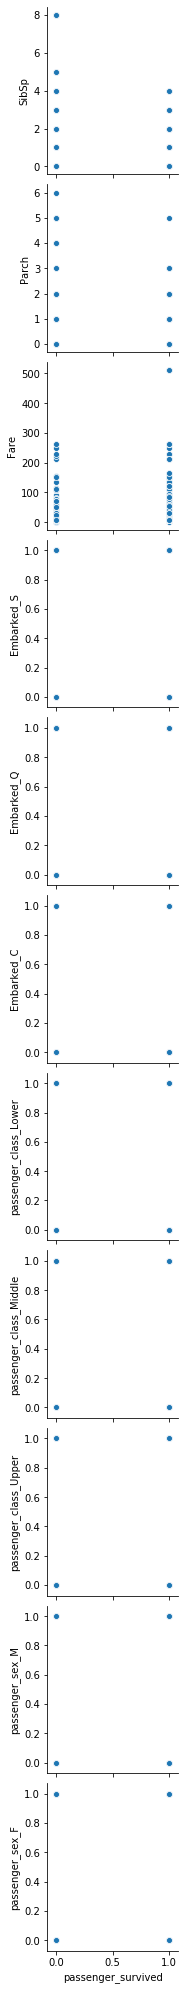

In [30]:
pp = sns.pairplot(data=dataset,
                  x_vars=['passenger_survived'],
                  y_vars=['SibSp','Parch','Fare','Embarked_S','Embarked_Q','Embarked_C','passenger_class_Lower',
                  'passenger_class_Middle','passenger_class_Upper','passenger_sex_M','passenger_sex_F'])

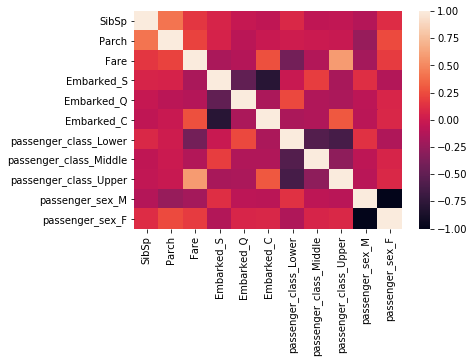

In [31]:
corr = dataset.corr()
sns.heatmap(corr)

De donde podemos ver que una alta correlacion entre variables pero exclusivamente las que pertenecen a la misma variable de la que fue creado el one hot.

In [32]:
columnas = list(dataset.columns)
llaves = ['var1','var2','var3','var4','var5','var6','var7','var8','var9','var10','var11']
diccionarioVariables = dict(zip(llaves, columnas))
output_dir = "./Files/"  + 'Diccionario_Variables' + '.pkl'
joblib.dump(diccionarioVariables,output_dir)

['./Files/Diccionario_Variables.pkl']

# Metodología

Vamos a reaizar en múltiples ocasiones primero una partición del conjunto luego para cada partición vamos a entrenar 4 distintos modelos y realizar un acoplamiento de esos 4 para obtener un resultado final, en donde para cada partición haremos lo siguiente:

## Entrenamiento

Empezamos creando la función Sampling que lo que hará es crear partición del dataset en tres conjuntos, uno que será utilizado para el entrenamiento del modelo, otro que será utilizado para determinar el conjunto de parámetros que tiene el mejor rendimiento y el último conjunto que es el de prueba a ser utilizado en la parte final de donde se derivarán conclusiones.

In [33]:
def Sampling(semilla=1):
    np.random.seed(semilla)
    train_dataset = dataset.sample(frac=0.8,random_state=0)
    test_dataset = dataset.drop(train_dataset.index)
    np.random.seed(semilla)
    val_dataset = train_dataset.sample(frac=0.2,random_state=0)
    train_dataset = train_dataset.drop(val_dataset.index)

    X_train = np.array(train_dataset[['SibSp','Parch','Fare','Embarked_S','Embarked_Q','Embarked_C','passenger_class_Lower',
                      'passenger_class_Middle','passenger_class_Upper','passenger_sex_M','passenger_sex_F']],dtype = np.float32)
    y_train = np.array(train_dataset[['passenger_survived']],dtype = np.float32)
    X_val = np.array(val_dataset[['SibSp','Parch','Fare','Embarked_S','Embarked_Q','Embarked_C','passenger_class_Lower',
                      'passenger_class_Middle','passenger_class_Upper','passenger_sex_M','passenger_sex_F']],dtype = np.float32)
    y_val = np.array(val_dataset[['passenger_survived']],dtype = np.float32)
    X_test = np.array(test_dataset[['SibSp','Parch','Fare','Embarked_S','Embarked_Q','Embarked_C','passenger_class_Lower',
                      'passenger_class_Middle','passenger_class_Upper','passenger_sex_M','passenger_sex_F']],dtype = np.float32)
    y_test = np.array(test_dataset[['passenger_survived']],dtype = np.float32)
    return X_train,y_train,X_val,y_val,X_test,y_test

### Árbles de decisión

Empezaremos encontrando el conjunto de parámetros para ccp_alpha, el cual es un indicador de cuánto hay que hacer a la hora de eliminar nodos hojas del árbol que son atribuidos al overfitting, función que será usada en la función "train_dt", la cual se encarga de gestionar todo el entrenamiento para árboles de decisión, guardando todos los resultados en disco.

In [34]:
def get_ccp_alphas(X_train,y_train):
    clf = tree.DecisionTreeClassifier(random_state=0)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities 
    return ccp_alphas

In [35]:
def train_dt(semilla=1):
    X_train,y_train,X_val,y_val,X_test,y_test = Sampling(semilla)
    ccp_alphas = get_ccp_alphas(X_train,y_train)
    
    meticas_dt = []
    cadena_configuracion = 'S' +str(semilla) + '_DecTre_' + 'var1_var2_var3_var4_var5_var6_var7_var8_var9_var10_var11_' 

    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_train)
        y_true = y_train
        accuracy_train = accuracy_score(y_true,y_pred)
        error_train = 1 - accuracy_train
        precision_train = precision_score(y_true,y_pred)
        recall_train = recall_score(y_true,y_pred)
        f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
        y_pred = clf.predict(X_val)
        y_true = y_val
        accuracy_val = accuracy_score(y_true,y_pred)
        error_val = 1 - accuracy_val
        precision_val = precision_score(y_true,y_pred)
        recall_val = recall_score(y_true,y_pred)
        f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
        cadena_configuracion_output = cadena_configuracion+'ccp_alpha='+str(ccp_alpha)
        meticas_dt.append({'cadena_configuracion': cadena_configuracion_output,
                        'accuracy_train':accuracy_train,'error_train':error_train,'precision_train':precision_train,
                        'recall_train':recall_train,'f1_score_train':f1_score_train,'accuracy_val':accuracy_val,
                        'error_val':error_val,'precision_val':precision_val,'recall_val':recall_val,
                        'f1_score_val':f1_score_val})
        output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
        joblib.dump(clf,output_dir)
        clfs.append([cadena_configuracion_output,clf])
    nombre_bitacora = './Files/bitacora_dt_S' + str(semilla) + '.csv'
    toCSV = meticas_dt
    keys = toCSV[0].keys()
    #print(keys)
    with open(nombre_bitacora, 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(toCSV)
    return clfs, meticas_dt
        

In [36]:
def best_metrics(models,metrics):
    piv_a = max(enumerate(metrics), key=lambda item: item[1]['accuracy_val'])
    id_max = piv_a[0]
    best_model = models[id_max]
    best_metrics = metrics[id_max]
    return best_model,best_metrics

In [37]:
dt1, metricas_dt1 = train_dt(1)
best_model_dt1,best_metrics_dt1 = best_metrics(dt1, metricas_dt1)
X_train,y_train,X_val,y_val,X_test,y_test = Sampling(1)
pred_piv = best_model_dt1[1].predict(X_val)
pd.crosstab(np.array(column_or_1d(pred_piv, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

Real,0.0,1.0
Pred,,
0.0,78,14
1.0,8,42


In [38]:
dt2, metricas_dt2 = train_dt(200)
best_model2,best_metrics2 = best_metrics(dt2, metricas_dt2)
X_train,y_train,X_val,y_val,X_test,y_test = Sampling(200)
pred_piv = best_model2[1].predict(X_val)
pd.crosstab(np.array(column_or_1d(pred_piv, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

Real,0.0,1.0
Pred,,
0.0,78,14
1.0,8,42


### Máquinas de vectores de soporte (SVM)

Empezaremos creando la función "train_sv" que internamente tiene un conjunto seleccionado de hiperparámetros para realizar la busqueda del mejor conjunto entre ellos y se encarga de gestionar todo el entrenamiento de las máquinas, guardando todos los resultados en disco.

In [39]:
def train_sv(semilla=1):
    X_train,y_train,X_val,y_val,X_test,y_test = Sampling(semilla)

    metricas_sv = []
    # regLog_lr=0.01_reg=0.1_var1_var2_var3
    cadena_configuracion = 'S' +str(semilla) + '_SVM_' + 'var1_var2_var3_var4_var5_var6_var7_var8_var9_var10_var11_' 

    C = [0.001,0.01,0.1,1,10,100,1000]
    kernel = ['linear','poly','rbf','sigmoid']
    gamma = [0.001,0.01,0.1,1]

    params = [(x,y,z) for x in C for y in kernel for z in gamma]

    svms = []

    #tmp = datetime.now()
    for i in range(len(params)):
        y_train = column_or_1d(y_train, warn=True)
        svm_piv = make_pipeline(StandardScaler(), SVC(class_weight='balanced',random_state=0,cache_size=1500,
                                                      C=params[i][0],kernel=params[i][1],gamma=params[i][2]))
        svm_piv.fit(X_train, y_train)
        y_pred = svm_piv.predict(X_train)
        y_true = y_train
        accuracy_train = accuracy_score(y_true,y_pred)
        error_train = 1 - accuracy_train
        precision_train = precision_score(y_true,y_pred)
        recall_train = recall_score(y_true,y_pred)
        f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
        y_pred = svm_piv.predict(X_val)
        y_true = y_val
        accuracy_val = accuracy_score(y_true,y_pred)
        error_val = 1 - accuracy_val
        precision_val = precision_score(y_true,y_pred)
        recall_val = recall_score(y_true,y_pred)
        f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
        cadena_configuracion_output = cadena_configuracion+'C='+str(params[i][0]) + '_kernel='+str(params[i][1]) +'_gamma='+str(params[i][2])
        metricas_sv.append({'cadena_configuracion':cadena_configuracion_output,
                        'accuracy_train':accuracy_train,'error_train':error_train,'precision_train':precision_train,
                        'recall_train':recall_train,'f1_score_train':f1_score_train,'accuracy_val':accuracy_val,
                        'error_val':error_val,'precision_val':precision_val,'recall_val':recall_val,
                        'f1_score_val':f1_score_val})
        output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
        joblib.dump(svm_piv,output_dir)
        svms.append([cadena_configuracion_output,svm_piv])
    #tmp-datetime.now()
    nombre_bitacora = './Files/bitacora_sv_S' + str(semilla) + '.csv'
    toCSV = metricas_sv
    keys = toCSV[0].keys()
    #print(keys)
    with open(nombre_bitacora, 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(toCSV)
    return svms, metricas_sv

In [40]:
def best_metrics(models,metrics):
    piv_a = max(enumerate(metrics), key=lambda item: item[1]['accuracy_val'])
    id_max = piv_a[0]
    return models[id_max], metrics[id_max]

In [41]:
sv1, metricas_sv1 = train_sv(1)
best_model_sv1,best_metrics_sv1 = best_metrics(sv1, metricas_sv1)
X_train,y_train,X_val,y_val,X_test,y_test = Sampling(1)
pred_piv = best_model_sv1[1].predict(X_val)
pd.crosstab(np.array(column_or_1d(pred_piv, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
 

Real,0.0,1.0
Pred,,
0.0,84,22
1.0,2,34


### Regresión Logística

Empezaremos creando la clase "ModeloRegresionLogistica" que nos ayudará para ser usada en el entranamiento de modelos de regresión logística, también se crean las funciones "EntrenamientoRegresionLogistica" y "ClasificadorBinario"; la primera que se encarga de la creación de un conjunto de parámetros entrenables bajo la calse de 
Regresión Logística y la segunda que toma un conjunto de parámetros obtenido del entrenamiento y devuelve la predicción de un nuevo conjunto de valores X. Al final se crea la función "train_lr" que es la que encarga de gestionar todo el entrenamiento de las regresiones logísticas, guardando todos los resultados en disco.

In [42]:
class ModeloRegresionLogistica:
    def __init__(self):
        tf.reset_default_graph()
        self.m = tf.get_variable("pendientes",dtype=tf.float32,shape=[11,2],initializer=tf.zeros_initializer())
        self.b = tf.get_variable("intercepto",dtype=tf.float32,shape=[2],initializer=tf.zeros_initializer())
        self.scale = tf.get_variable("scale",dtype=tf.bool,initializer=False)
        self.los_sd = tf.get_variable("sd",dtype=tf.float32,shape=[11],initializer=tf.ones_initializer())
        self.los_mean = tf.get_variable("mean",dtype=tf.float32,shape=[11],initializer=tf.zeros_initializer())

    def __call__(self,x):
        return tf.nn.sigmoid(tf.add(tf.tensordot((x-self.los_mean)/self.los_sd, self.m,axes = [[1], [0]]), self.b)) 

    def actualizar(self,x,y,learning_rate,lambda_r,alpha_r):
        prediccion = self(x)
        cost = tf.reduce_mean(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = prediccion, labels = y) ,1)) +  alpha_r * lambda_r * tf.reduce_mean(tf.math.abs(self.m)) + 0.5 * (1-alpha_r) * lambda_r * tf.reduce_mean(self.m**2) 
        with tf.name_scope("Cost"):
                cost_summary = tf.summary.scalar(name = "CostSummary", tensor = cost)
        correctas = tf.equal(tf.argmax(prediccion, 1), tf.argmax(y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correctas, tf.float32))
        with tf.name_scope("Accuracy"):
                accuracy_summary = tf.summary.scalar(name = "AccuracySummary", tensor = accuracy)
        gradiente = tf.gradients(cost,[self.m,self.b])
        actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0] )
        actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1] )
        actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

        return actualizacion_parametros,cost_summary,accuracy_summary

    def actualizar_scale(self,x):
        los_sd = tf.math.reduce_std(X_train.astype(np.float32),0)
        los_mean = tf.reduce_mean(X_train.astype(np.float32),0)
        actualizacion_sd = tf.assign(self.los_sd, los_sd)
        actualizacion_mean = tf.assign(self.los_mean, los_mean)
        actualizacion_scale = tf.assign(self.scale, True)
        actualizacion_detallesScale = tf.group(actualizacion_scale,actualizacion_mean,actualizacion_sd)
        return actualizacion_detallesScale

In [43]:
def EntrenamientoRegresionLogistica(var_x,var_y,lambda_r = 0,alpha_r = 0,learning_rate = 0.000000001,epochs=500,batch_size=32,scale = False):
    modelo = ModeloRegresionLogistica()
    tamaño_muestra = len(X_test)
    total_iteraciones = int(tamaño_muestra/batch_size)

    tensor_x = tf.placeholder(tf.float32,[None,11],"tensor_x")
    tensor_y = tf.placeholder(tf.float32,[None,2],"tensor_y")

    now = datetime.now()
    logdir = "./tf_logs/" + now.strftime("%Y%m%d-%H%M%S") +'alpha_r' + str(alpha_r) + 'lambda_r'+str(lambda_r) +"_lr_"+str(learning_rate) + "_epochs_" + str(epochs)  + "_batch_size_" + str(batch_size) + "_scale_" + str(scale)  
    
    #prediccion = modelo(tensor_x)
    actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate,lambda_r,alpha_r)
    actualizacion_scale = modelo.actualizar_scale(tensor_x)

    with tf.train.MonitoredSession() as session:
        train_writer = tf.summary.FileWriter( logdir, session.graph)
        
        if scale:
            feed_dict = {tensor_x:var_x}
            session.run(actualizacion_scale,feed_dict=feed_dict)
        
        print("Vamos a hacer ",epochs," epochs con ", total_iteraciones, "iteraciones cada una")
        for epoch in range(epochs):

            for i in range(total_iteraciones):
                muestra_inicio = i*batch_size
                muestra_fin = muestra_inicio + batch_size
                x_mb =  np.array(var_x[muestra_inicio:muestra_fin])
                y_mb = np.array(var_y[muestra_inicio:muestra_fin])
                feed_dict = {tensor_x:x_mb, tensor_y:y_mb}
                
                la_actualizacion = session.run(actualizacion_parametros,feed_dict=feed_dict)
                train_writer.add_summary(la_actualizacion[1],epoch * total_iteraciones + i) #Cost
                train_writer.add_summary(la_actualizacion[2],epoch * total_iteraciones + i) #Accuracy
            #feed_dict = {tensor_x:var_x, tensor_y:var_y}
            #predicciones = session.run(prediccion,feed_dict=feed_dict)
            #if (epoch+1)%50 ==0:
            #    print("Epoch ", epoch+1 )
            
        pendiente_final,intercepto_final,scale_final,los_mean,los_sd = session.run([modelo.m,modelo.b,modelo.scale,modelo.los_mean,modelo.los_sd],feed_dict=feed_dict)
        
    return pendiente_final,intercepto_final,scale_final,los_mean,los_sd

In [44]:
def ClasificadorBinario(pred_x,pendientes,interceptos,scale,mean,sd):
    if scale:
        pred_x = (pred_x-mean.astype(np.float32))/sd.astype(np.float32)
        pred_f = tf.argmax(tf.add(tf.tensordot(pred_x, pendientes,axes = [[1], [0]]), interceptos),1)
    else:
        pred_f = tf.argmax(tf.add(tf.tensordot(pred_x.astype(np.float32), pendientes,axes = [[1], [0]]), interceptos),1)
    with tf.Session() as sess: 
        pred_f_val = pred_f.eval()
    return pred_f_val

In [45]:
def train_lr(semilla=1):
    X_train,y_train,X_val,y_val,X_test,y_test = Sampling(semilla)
    #print("y_train",y_train.shape)
    y_train_piv = column_or_1d(y_train, warn=True)
    #print("y_train_piv",y_train_piv.shape)
    n_train = np.max(y_train_piv.astype(int)) + 1
    y_train_onehot = np.eye(n_train)[y_train.astype(int)]
    y_train_onehot = y_train_onehot.reshape((-1, 2))
    #print("y_train_onehot",y_train_onehot.shape)
    meticas_rl = []
    # regLog_lr=0.01_reg=0.1_var1_var2_var3
    cadena_configuracion = 'S' + str(semilla)+ '_RegLog_' + 'var1_var2_var3_var4_var5_var6_var7_var8_var9_var10_var11_' 

    lambda_r = [0.001,0.01,0.1,1,10,100,1000]
    alpha_r = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    epochs = [100,500]
    batch_size = [32,40,50]
    scale = [True,False]

    params = [(v,w,x,y,z) for v in lambda_r for w in alpha_r for x in epochs for y in batch_size for z in scale]

    RegLogs = []

    #tmp = datetime.now()
    for i in range(len(params)):

        salida_RegLog = EntrenamientoRegresionLogistica(X_train,y_train_onehot,lambda_r = params[i][0],alpha_r = params[i][1],
                                                        epochs = params[i][2],batch_size = params[i][3],scale = params[i][4])
        pendiente_final,intercepto_final,scale_final,los_mean,los_sd = salida_RegLog
        pred_piv = ClasificadorBinario(X_train,pendiente_final,intercepto_final,scale_final,los_mean,los_sd)
        y_true = y_train
        y_pred = pred_piv
        accuracy_train = accuracy_score(y_true,y_pred)
        error_train = 1 - accuracy_train
        precision_train = precision_score(y_true,y_pred)
        recall_train = recall_score(y_true,y_pred)
        f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
        pred_piv = ClasificadorBinario(X_val,pendiente_final,intercepto_final,scale_final,los_mean,los_sd)
        y_true = y_val
        y_pred = pred_piv
        accuracy_val = accuracy_score(y_true,y_pred)
        error_val = 1 - accuracy_val
        precision_val = precision_score(y_true,y_pred)
        recall_val = recall_score(y_true,y_pred)
        f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
        cadena_configuracion_output = cadena_configuracion + 'lambda='+str(params[i][0]) + '_alpha=' + str(params[i][1]) + '_epochs=' + str(params[i][2]) + '_batchsize=' + str(params[i][3]) + '_scale=' + str(params[i][4])
        meticas_rl.append({'cadena_configuracion': cadena_configuracion_output,
                        'accuracy_train':accuracy_train,'error_train':error_train,'precision_train':precision_train,
                        'recall_train':recall_train,'f1_score_train':f1_score_train,'accuracy_val':accuracy_val,
                        'error_val':error_val,'precision_val':precision_val,'recall_val':recall_val,
                        'f1_score_val':f1_score_val})
        output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
        joblib.dump(salida_RegLog,output_dir)
        RegLogs.append([cadena_configuracion_output,salida_RegLog])
    #tmp-datetime.now()
    nombre_bitacora = './Files/bitacora_rl_S' + str(semilla) + '.csv'
    toCSV = meticas_rl
    keys = toCSV[0].keys()
    #print(keys)
    with open(nombre_bitacora, 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(toCSV)
    return RegLogs,meticas_rl

In [46]:
lr1, metricas_lr1 = train_lr(1)
best_model_lr1,best_metrics_lr1 = best_metrics(lr1, metricas_lr1)
X_train,y_train,X_val,y_val,X_test,y_test = Sampling(1)
pred_piv = ClasificadorBinario(X_val,best_model_lr1[1][0],best_model_lr1[1][1],best_model_lr1[1][2],best_model_lr1[1][3],best_model_lr1[1][4])
pd.crosstab(np.array(column_or_1d(pred_piv, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was 

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  4 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  100  epochs con  3 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  5 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteraciones cada una
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Vamos a hacer  500  epochs con  4 iteracio

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Real,0.0,1.0
Pred,,
0,74,16
1,12,40


### Red neuronal (Multi-layer Perceptron)

Crearemos un cuarto modelo que será una red neuronal, en lugar de utilizar un modelo de Naive Bayes ya que su creación e implementación tenían complicaciones y para aportar un cuarto modelo las redes neuronales con scikit learn y del tipo "Multi-layer Perceptron" fueron elegidas.
Empezaremos creando la función "train_nn" que internamente tiene un conjunto seleccionado de hiperparámetros para realizar la busqueda del mejor conjunto entre ellos y se encarga de gestionar todo el entrenamiento de las máquinas, guardando todos los resultados en disco.

In [47]:
def train_nn(semilla=1):
    X_train,y_train,X_val,y_val,X_test,y_test = Sampling(semilla)
    meticas_nn = []
    # regLog_lr=0.01_reg=0.1_var1_var2_var3
    cadena_configuracion = 'S' + str(semilla)+ '_NNet_' + 'var1_var2_var3_var4_var5_var6_var7_var8_var9_var10_var11_' 

    hidden_layer_sizes = [(1),(2),(3),(4),(5),(6),(7),(8),(9),(10),(11),(11,1),(11,2),(11,3),(11,4),(11,5),(11,6),(11,7),
                          (11,8),(11,9),(11,10),(11,11)]
    activation = ['identity', 'logistic', 'tanh', 'relu']
    solver = ['lbfgs']
    alpha = [0,0.0001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    max_iter = [200,500]

    params = [(v,w,x,y,z) for v in hidden_layer_sizes for w in activation for x in solver for y in alpha for z in max_iter]

    NNets = []

    #tmp = datetime.now()
    for i in range(len(params)):
        y_train = column_or_1d(y_train, warn=True)
        nnet_piv = MLPClassifier(hidden_layer_sizes = params[i][0],activation = params[i][1],solver = params[i][2],
                                 alpha = params[i][3], max_iter = params[i][4])
        nnet_piv.fit(X_train, y_train)
        y_pred = nnet_piv.predict(X_train)
        y_true = y_train
        accuracy_train = accuracy_score(y_true,y_pred)
        error_train = 1 - accuracy_train
        precision_train = precision_score(y_true,y_pred)
        recall_train = recall_score(y_true,y_pred)
        f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
        y_pred = nnet_piv.predict(X_val)
        y_true = y_val
        accuracy_val = accuracy_score(y_true,y_pred)
        error_val = 1 - accuracy_val
        precision_val = precision_score(y_true,y_pred)
        recall_val = recall_score(y_true,y_pred)
        f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
        cadena_configuracion_output = cadena_configuracion+'hidden_layer_sizes='+ str(params[i][0]) + '_activation=' +  str(params[i][1]) + '_solver=' + str(params[i][2]) + '_alpha=' + str(params[i][3]) + '_max_iter=' + str(params[i][4])
        meticas_nn.append({'cadena_configuracion': cadena_configuracion_output,
                        'accuracy_train':accuracy_train,'error_train':error_train,'precision_train':precision_train,
                        'recall_train':recall_train,'f1_score_train':f1_score_train,'accuracy_val':accuracy_val,
                        'error_val':error_val,'precision_val':precision_val,'recall_val':recall_val,
                        'f1_score_val':f1_score_val})
        output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
        joblib.dump(nnet_piv,output_dir)
        NNets.append([cadena_configuracion_output,nnet_piv])
    nombre_bitacora = './Files/bitacora_nn_S' + str(semilla) + '.csv'
    toCSV = meticas_nn
    keys = toCSV[0].keys()
    #print(keys)
    with open(nombre_bitacora, 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(toCSV)
    #tmp-datetime.now()
    return NNets,meticas_nn

In [49]:
nn1, metricas_nn1 = train_nn(1)
best_model_nn1,best_metrics_nn1 = best_metrics(nn1, metricas_nn1)
X_train,y_train,X_val,y_val,X_test,y_test = Sampling(1)
pred_piv = best_model_nn1[1].predict(X_val)
pd.crosstab(np.array(column_or_1d(pred_piv, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
 

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\me

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted sampl

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_en

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\me

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_en

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_c

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to co

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.ht

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_net

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\me

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_res

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\me

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_en

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\me

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tenso

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_en

Real,0.0,1.0
Pred,,
0.0,84,20
1.0,2,36


In [50]:
pred_ct_val = best_model_dt1[1].predict(X_val)
pred_sv_val = best_model_sv1[1].predict(X_val)
pred_rl_val = ClasificadorBinario(X_val,best_model_lr1[1][0],best_model_lr1[1][1],best_model_lr1[1][2],best_model_lr1[1][3],best_model_lr1[1][4])
pred_nn_val = best_model_nn1[1].predict(X_val)

In [51]:
pred_em_val = pred_ct_val + pred_sv_val + pred_rl_val #+ pred_nn_val
pred_em_val[pred_em_val<=2]=0
pred_em_val[pred_em_val>=2]=1
print('Mejor accuracy en modelos de árboles de decisión: ', accuracy_score(y_val,pred_ct_val))
print('Mejor accuracy en modelos de máquinas de vectores de soporte: ', accuracy_score(y_val,pred_sv_val))
print('Mejor accuracy en modelos de regresión logística: ', accuracy_score(y_val,pred_rl_val))
print('Mejor accuracy en modelos de redes neuronales: ', accuracy_score(y_val,pred_nn_val))
print('Accuracy del acoplamiento en el conjunto de validación: ', accuracy_score(y_val,pred_em_val))
pd.crosstab(np.array(column_or_1d(pred_em_val, warn=True)), np.array(column_or_1d(y_val, warn=True)), rownames = ['Pred'], colnames = ['Real'])

Mejor accuracy en modelos de árboles de decisión:  0.8450704225352113
Mejor accuracy en modelos de máquinas de vectores de soporte:  0.8309859154929577
Mejor accuracy en modelos de regresión logística:  0.8028169014084507
Mejor accuracy en modelos de redes neuronales:  0.8450704225352113
Accuracy del acoplamiento en el conjunto de validación:  0.8380281690140845


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Real,0.0,1.0
Pred,,
0.0,85,22
1.0,1,34


In [52]:
pred_ct_test = best_model_dt1[1].predict(X_test)
pred_sv_test = best_model_sv1[1].predict(X_test)
pred_rl_test = ClasificadorBinario(X_test,best_model_lr1[1][0],best_model_lr1[1][1],best_model_lr1[1][2],best_model_lr1[1][3],best_model_lr1[1][4])
pred_nn_test = best_model_nn1[1].predict(X_test)
pred_em_test = pred_ct_test + pred_sv_test + pred_rl_test + pred_nn_test
pred_em_test[pred_em_test<=2]=0
pred_em_test[pred_em_test>=2]=1
y_test = column_or_1d(y_test, warn=True)
print('Mejor accuracy en modelos de árboles de decisión: ', accuracy_score(y_test,pred_ct_test))
print('Mejor accuracy en modelos de máquinas de vectores de soporte: ', accuracy_score(y_test,pred_sv_test))
print('Mejor accuracy en modelos de regresión logística: ', accuracy_score(y_test,pred_rl_test))
print('Mejor accuracy en modelos de redes neuronales: ', accuracy_score(y_test,pred_nn_test))
print('Accuracy del acoplamiento en el conjunto de validación: ', accuracy_score(y_test,pred_em_test))
pd.crosstab(np.array(pred_em_test), np.array(y_test), rownames = ['Pred'], colnames = ['Real'])

Mejor accuracy en modelos de árboles de decisión:  0.8258426966292135
Mejor accuracy en modelos de máquinas de vectores de soporte:  0.8202247191011236
Mejor accuracy en modelos de regresión logística:  0.7921348314606742
Mejor accuracy en modelos de redes neuronales:  0.8258426966292135
Accuracy del acoplamiento en el conjunto de validación:  0.8258426966292135


C:\Users\jose-\Anaconda3\envs\Clases_tensorflow_env2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Real,0.0,1.0
Pred,,
0.0,99,25
1.0,6,48


In [53]:
accuracy_test = accuracy_score(y_test,pred_em_test)
error_test = 1 - accuracy_test
precision_test = precision_score(y_test,pred_em_test)
recall_test = recall_score(y_test,pred_em_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

In [54]:
metricas = {'Accuracy': accuracy_test, 'Error': error_test,'Precision': precision_test, 'Recall': recall_test, 'F1 Score': f1_score_test }
df_metricas = pd.DataFrame(data=metricas, index=[0])

In [55]:
df_metricas

,Accuracy,Error,Precision,Recall,F1 Score
0,0.825843,0.174157,0.888889,0.657534,0.755906


## Deployment

Para utilizar en futuras ocasiones los modelos entrenados anteriormente se guardaran nuevamente, solo que con un nombre diferente para señalizar que son los campeones de cada tipo de modelo, igualmente se guardarán las funciones necesarias para su utilización en caso existan, para lo cual se realizará lo siguiente: 

In [56]:
cadena_configuracion_output =  'Best_' + best_model_dt1[0]
output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
joblib.dump(best_model_dt1[1],output_dir)
cadena_configuracion_output =  'Best_' + best_model_sv1[0]
output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
joblib.dump(best_model_sv1[1],output_dir)
cadena_configuracion_output =  'Best_' + best_model_lr1[0]
output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
joblib.dump(best_model_lr1[1],output_dir)
cadena_configuracion_output =  'Best_' + best_model_nn1[0]
output_dir = "./Objects/"  + cadena_configuracion_output + '.pkl'
joblib.dump(best_model_nn1[1],output_dir)


['./Objects/Best_S1_NNet_var1_var2_var3_var4_var5_var6_var7_var8_var9_var10_var11_hidden_layer_sizes=2_activation=logistic_solver=lbfgs_alpha=0.1_max_iter=500.pkl']

# Conclusiones

- Se logró crear un pipeline funcional, registrandoe en cada paso una btácora de todo el entrenamiento para posteriores revisiones y mejoras.
- Se alcanzó la meta de accuracy deseada.
- El acoplar modelos individuales para realizar un modelo mejor es una buena práctica que ayuda a mejorar un poco la eficiencia obtenida por los modelos individuales, siempre que éstos tengan una eficiencia similar.
- Las herramientas previamente creadas en la librería sklearn tienen un desempeño favorable, fácilmente llegaron a una eficiencia significativa con una buena base de hiperparámetros.


# Recomendaciones

- En el acoplamiento de modelos se tiene que tener en cuenta la eficiencia que tiene cada uno de los modelos individuales ya que en caso que uno de los modelos individuales tenga una mala eficiencia se arrastra el modelo, sería prudente considerar la eficiencia del modelo individual como un peso y realizar un promedio ponderado en el acoplamiento. Ésto puesto que en el entrenamiento del modelo observe que una mala eficiencia en un modelo se arrastra los resultados hacía ella, teniendo un modelo final pero que el mejor de los individuales.
- Realizar el ejercicio pero con la implementación del modelo de "naive bayes", ya que en éste notebook no fue utilizado por la dificultad de su implementación.
- Realizar otras corridas con distintas semillas para verificar sin de esa forma, con un muestreo boostrap el resultado mejora.
- Repetir el experimento utilizando k-fold cross validation para obtener la eficiencia y los modelos.

# Anexos
## k-fold cross validation 

Es un proceso en modelos de aprendizaje de máquinas de permutación del rol (train/test) de las observaciones en el conjunto de entrenamiento de un dataset aveces limitado.

Éste proceso solamente depende de un parámetro, adicional a su metodología, y es el parámetro "k" que le da el nombre al proceso.

La validación cruzada (croos validation) se utiliza para estimar la habilidad de generalización que tiene un modelo de machine learning, es decir cuán eficiente es en observaciones no vistas durante el entenamiento. 

Tiene la ventja de ser fácil de entender además de que usualmente sus resultados tienen menos sesgo y la generalización del momdelo es menos optimista que métodos como la única partición "train/test".

Un posible pseudocódigo del proceso es el siguiente:

1. Hacer un muestreo aleatorio de toda la data sin repeticiones.
2. Particionar la data en k conjuntos.
3. Iterar para cada grupo lo siguiente:
    1. Considerar ese grupo como el "test dataset".
    2. Agrupar los k-1 grupos restantes como el "train dataset".
    3. Entrenar el modelo con el "train dataset" y evaluarlo en el "test dataset".
    4. Registrar los resultados de la evaluación y deshechar el modelo entrenado.
4. Sumarizar los resultados de las k evaluaciones realizadas y entrenar el modelo final con todo el conjunto inicial.